<a href="https://colab.research.google.com/github/vanshdhiman090/websiteanalysis/blob/main/websiteanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/data-export (1).csv')
df.columns=df.iloc[0]
df = df[1:]
df.reset_index(drop=True, inplace=True)
display(df.head())

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [ ]:
# Ensure the column is string type before extracting the hour
df['Hour'] = df['Date + hour (YYYYMMDDHH)'].astype(str).str[-2:]

# Extract only the date part and format it
df['Date + hour (YYYYMMDDHH)'] = df['Date + hour (YYYYMMDDHH)'].astype(str).str[:8]
df['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(df['Date + hour (YYYYMMDDHH)'], format='%Y%m%d').dt.strftime('%Y.%m.%d')


# Get the index of the 'Date + hour (YYYYMMDDHH)' column
date_hour_col_index = df.columns.get_loc('Date + hour (YYYYMMDDHH)')


hour_col = df.pop('Hour')
df.insert(date_hour_col_index + 1, 'Hour', hour_col)

display(df.head())

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Hour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024.04.16,23,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024.04.17,19,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024.04.17,23,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024.04.17,18,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024.04.17,20,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


Changing the Columns name


In [ ]:
df.columns.values[0]= 'Channel_Group'
df.columns.values[1]= 'Date'


df.rename(columns={
    'Engaged sessions': 'Engaged_sessions',
    'Average engagement time per session': 'Average_engagement_time_per_session',
    'Engaged sessions per user': 'Engaged_sessions_per_user',
    'Events per session': 'Events_per_session',
    'Engagement rate': 'Engagement_rate',
    'Event count': 'Event_count'
}, inplace=True)

display(df.head())

,Channel_Group,Date,Hour,Users,Sessions,Engaged_sessions,Average_engagement_time_per_session,Engaged_sessions_per_user,Events_per_session,Engagement_rate,Event_count
0,Direct,2024.04.16,23,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024.04.17,19,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024.04.17,23,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024.04.17,18,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024.04.17,20,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel_Group                        3182 non-null   object
 1   Date                                 3182 non-null   object
 2   Hour                                 3182 non-null   object
 3   Users                                3182 non-null   object
 4   Sessions                             3182 non-null   object
 5   Engaged_sessions                     3182 non-null   object
 6   Average_engagement_time_per_session  3182 non-null   object
 7   Engaged_sessions_per_user            3182 non-null   object
 8   Events_per_session                   3182 non-null   object
 9   Engagement_rate                      3182 non-null   object
 10  Event_count                          3182 non-null   object
dtypes: object(11)
memory usage: 273.6+ KB
None


In [ ]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y.%m.%d')

# Convert 'Hour' to numeric (as time format conversion can be complex)
df['Hour'] = pd.to_numeric(df['Hour'], errors='coerce')

# List of columns to convert to numeric
numeric_cols = ['Users', 'Sessions', 'Engaged_sessions', 'Average_engagement_time_per_session',
                'Engaged_sessions_per_user', 'Events_per_session', 'Engagement_rate', 'Event_count']

# Convert numeric columns
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel_Group                        3182 non-null   object        
 1   Date                                 3182 non-null   datetime64[ns]
 2   Hour                                 3182 non-null   int64         
 3   Users                                3182 non-null   int64         
 4   Sessions                             3182 non-null   int64         
 5   Engaged_sessions                     3182 non-null   int64         
 6   Average_engagement_time_per_session  3182 non-null   float64       
 7   Engaged_sessions_per_user            3182 non-null   float64       
 8   Events_per_session                   3182 non-null   float64       
 9   Engagement_rate                      3182 non-null   float64       
 10  Event_count 

None

,Channel_Group,Date,Hour,Users,Sessions,Engaged_sessions,Average_engagement_time_per_session,Engaged_sessions_per_user,Events_per_session,Engagement_rate,Event_count
0,Direct,2024-04-16,23,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024-04-17,19,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024-04-17,23,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024-04-17,18,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024-04-17,20,175,221,112,46.918552,0.640000,4.529412,0.506787,1001


In [ ]:
print(df.isnull().sum())

0
Channel_Group                          0
Date                                   0
Hour                                   0
Users                                  0
Sessions                               0
Engaged_sessions                       0
Average_engagement_time_per_session    0
Engaged_sessions_per_user              0
Events_per_session                     0
Engagement_rate                        0
Event_count                            0
dtype: int64


*What trends can you observe in website sessoins and users over the time ?*

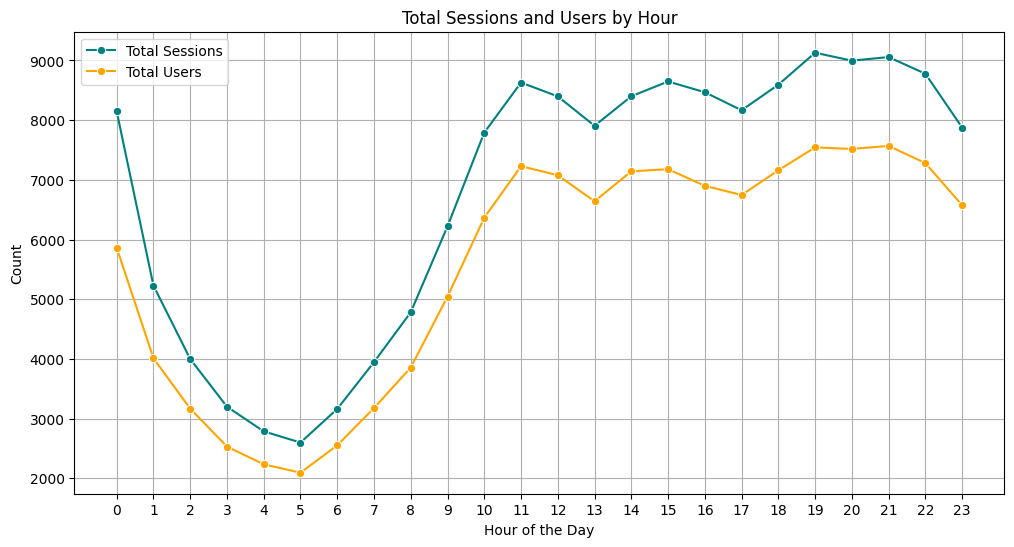

In [ ]:
# Aggregate sessions and users by hour
hourly_data = df.groupby('Hour')[['Sessions', 'Users']].sum().reset_index()

# Sort by hour to ensure the line chart is ordered correctly
hourly_data = hourly_data.sort_values(by='Hour')

# Create the line chart
plt.figure(figsize=(12, 6))

sns.lineplot(data=hourly_data, x='Hour', y='Sessions', marker='o', color='teal', label='Total Sessions')
sns.lineplot(data=hourly_data, x='Hour', y='Users', marker='o', color='orange', label='Total Users')


plt.title('Total Sessions and Users by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.xticks(hourly_data['Hour'])
plt.grid(True)
plt.legend()
plt.show()

*Which marketing channels brought the high numbers of users ?*

/tmp/ipython-input-142-795207610.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=users_by_channel, x='Channel_Group', y='Users', palette='viridis')


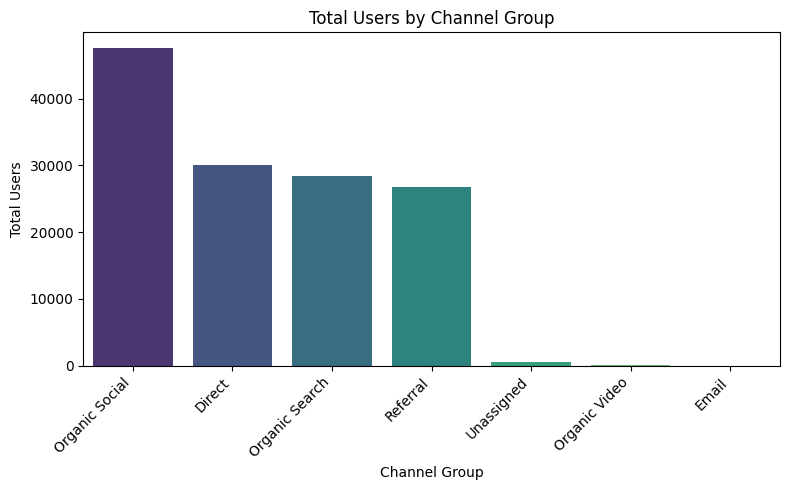

In [ ]:
# Aggregate users by channel group
users_by_channel = df.groupby('Channel_Group')['Users'].sum().reset_index()

# Sort the channels by total users in descending order
users_by_channel = users_by_channel.sort_values(by='Users', ascending=False)

# Create the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=users_by_channel, x='Channel_Group', y='Users', palette='viridis')

plt.title('Total Users by Channel Group')
plt.xlabel('Channel Group')
plt.ylabel('Total Users')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Which channel has highest average engagement time  ?

*Which channel has highest average engagement time  ? *

/tmp/ipython-input-143-1125619153.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=engagement_time_by_channel, x='Channel_Group', y='Average_engagement_time_per_session', palette='plasma')


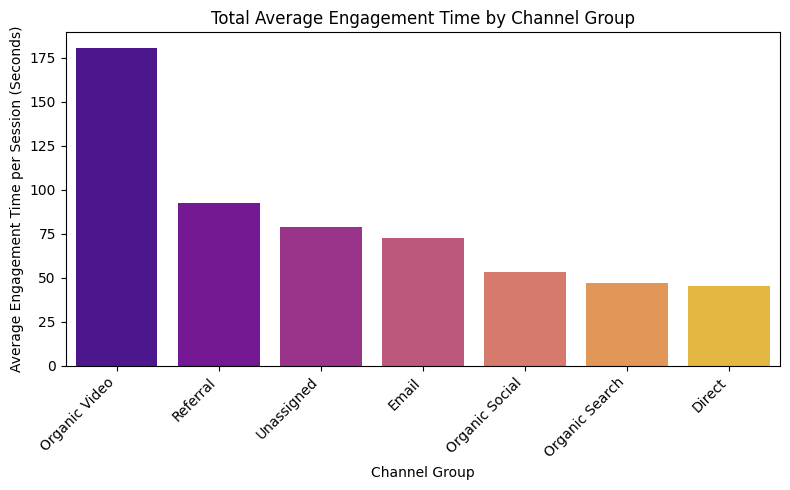

In [ ]:
# Aggregate average engagement time by channel group
engagement_time_by_channel = df.groupby('Channel_Group')['Average_engagement_time_per_session'].mean().reset_index()

# Sort the channels by average engagement time in descending order
engagement_time_by_channel = engagement_time_by_channel.sort_values(by='Average_engagement_time_per_session', ascending=False)


plt.figure(figsize=(8, 5))
sns.barplot(data=engagement_time_by_channel, x='Channel_Group', y='Average_engagement_time_per_session', palette='plasma')

plt.title('Total Average Engagement Time by Channel Group')
plt.xlabel('Channel Group')
plt.ylabel('Average Engagement Time per Session (Seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*How does  channels are corelate with engagement rate ?*

/tmp/ipython-input-144-4102009978.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Channel_Group', y='Engagement_rate', palette='viridis')


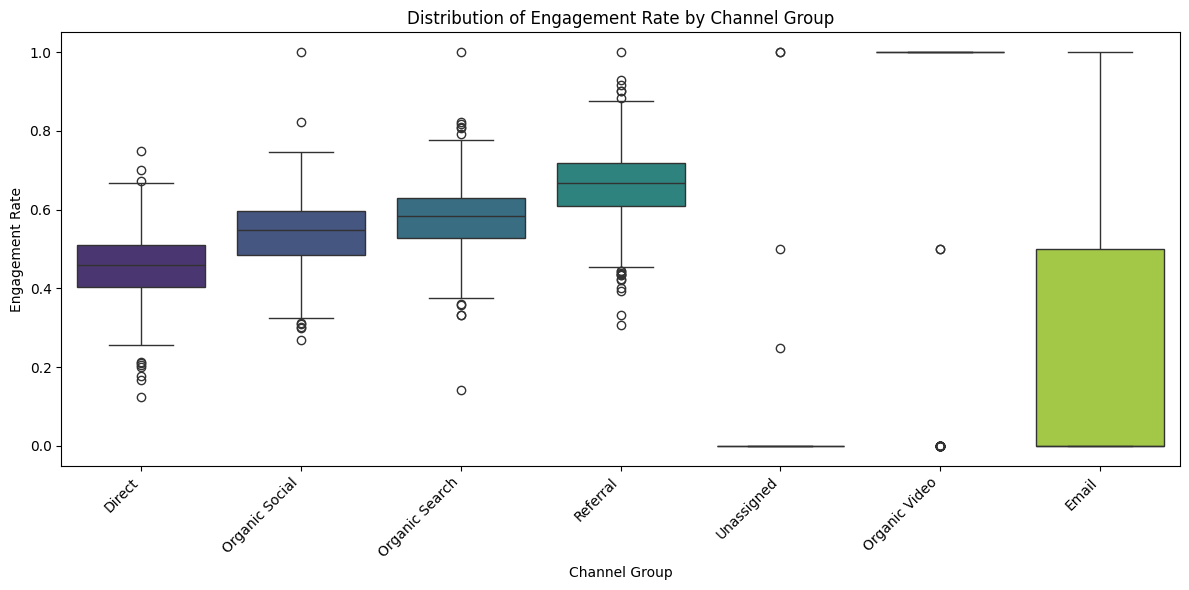

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Channel_Group', y='Engagement_rate', palette='viridis')

plt.title('Distribution of Engagement Rate by Channel Group')
plt.xlabel('Channel Group')
plt.ylabel('Engagement Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

which channels has more engagement sessions comapred to non engagement sessions ?


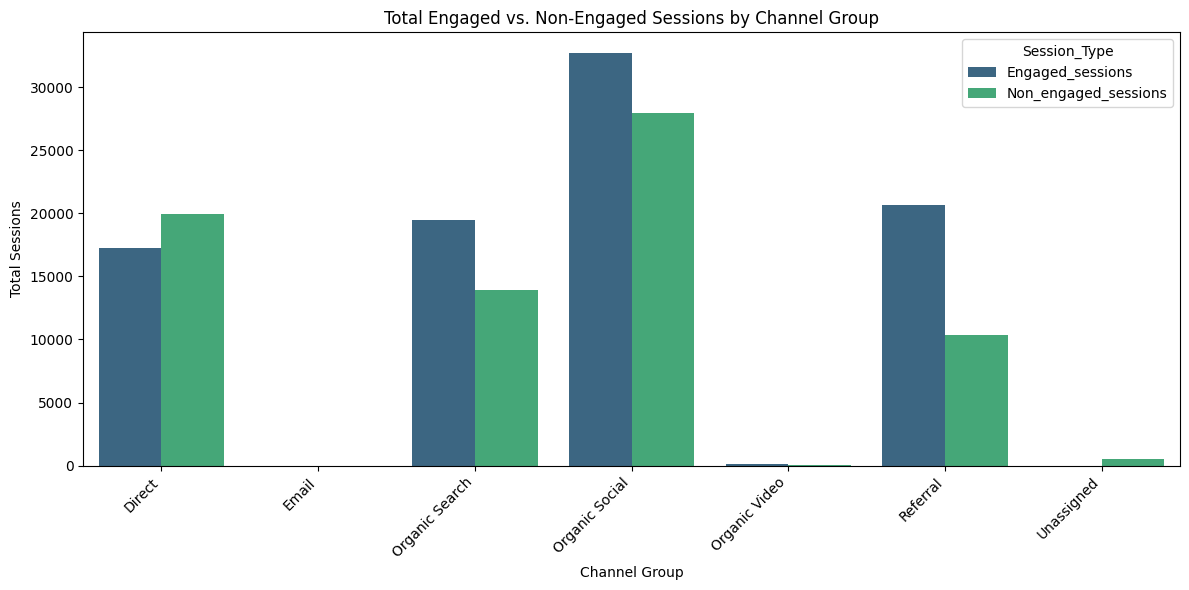

In [ ]:
# Calculate non-engaged sessions
df['Non_engaged_sessions'] = df['Sessions'] - df['Engaged_sessions']

# Aggregate engaged and non-engaged sessions by channel group
sessions_by_channel = df.groupby('Channel_Group')[['Engaged_sessions', 'Non_engaged_sessions']].sum().reset_index()


sessions_melted = sessions_by_channel.melt(id_vars='Channel_Group', var_name='Session_Type', value_name='Total_Sessions')

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=sessions_melted, x='Channel_Group', y='Total_Sessions', hue='Session_Type', palette='viridis')

plt.title('Total Engaged vs. Non-Engaged Sessions by Channel Group')
plt.xlabel('Channel Group')
plt.ylabel('Total Sessions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

*Traffic by Hour and Channels*

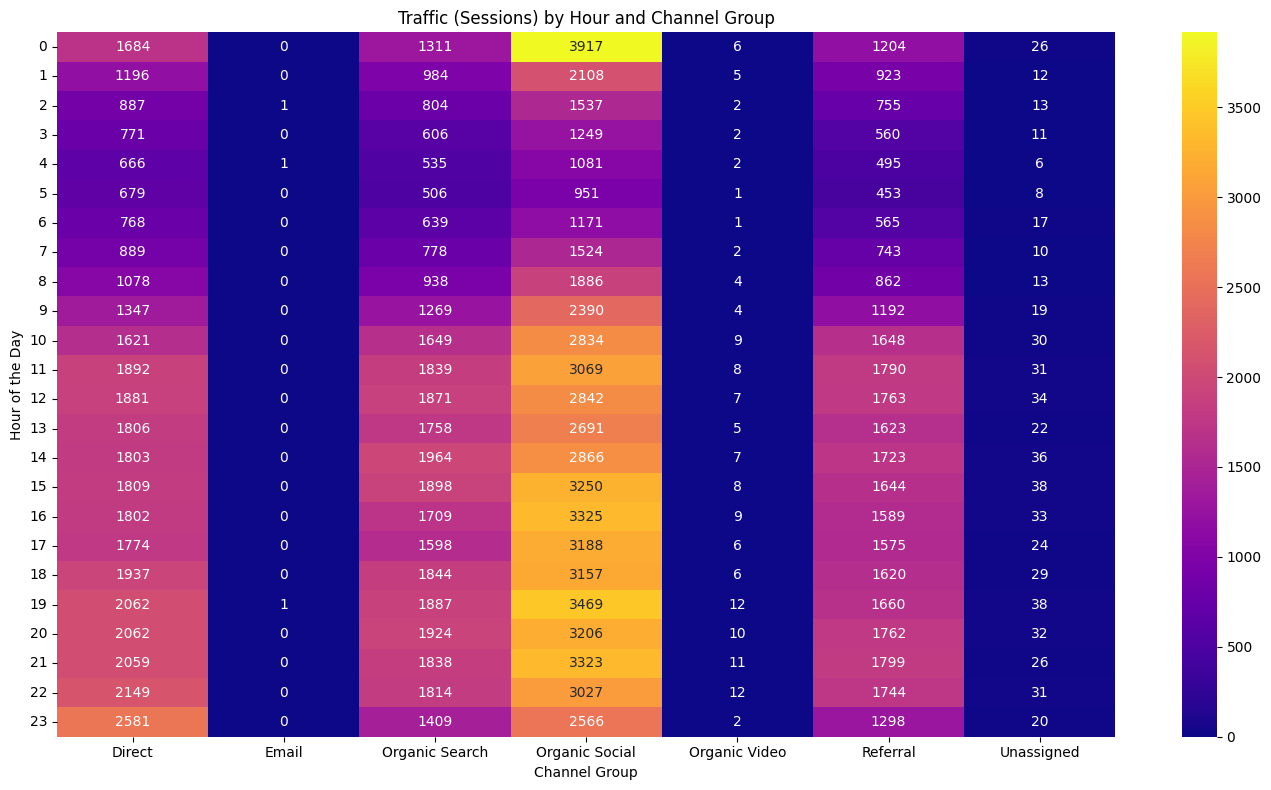

In [ ]:
# Aggregate sessions by Hour and Channel_Group
traffic_by_hour_channel = df.groupby(['Hour', 'Channel_Group'])['Sessions'].sum().reset_index()

# Pivot the data to create a matrix for the heatmap
heatmap_data = traffic_by_hour_channel.pivot_table(index='Hour', columns='Channel_Group', values='Sessions', fill_value=0)


plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='plasma')

plt.title('Traffic (Sessions) by Hour and Channel Group')
plt.xlabel('Channel Group')
plt.ylabel('Hour of the Day')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

*Which Day is valuable for the website ?*

/tmp/ipython-input-147-2254409488.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sessions_by_weekday.index, y=sessions_by_weekday.values, palette='viridis')


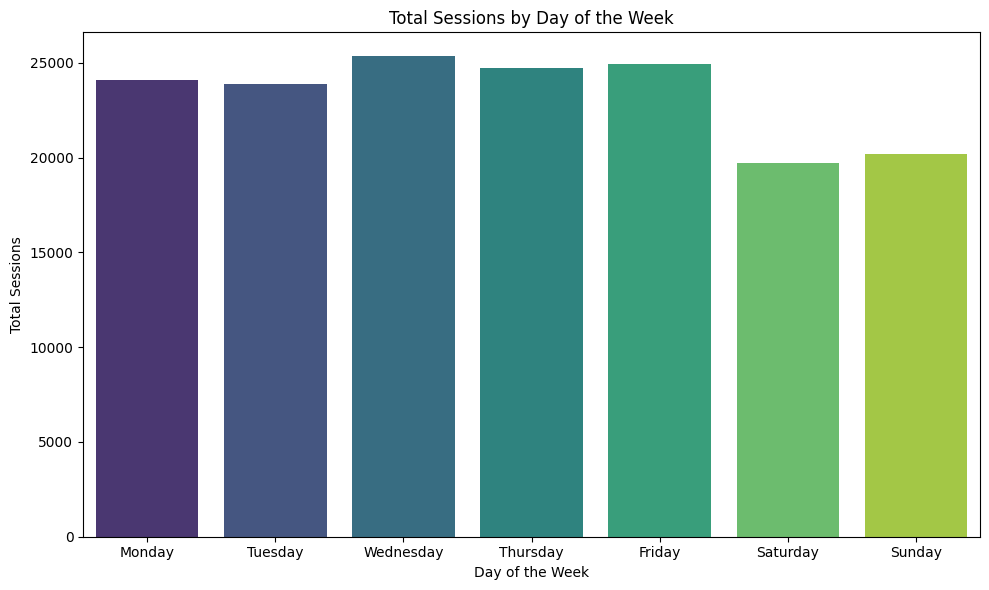

In [ ]:
# Extract weekday from the 'Date' column
df['Weekday'] = df['Date'].dt.day_name()

# Define the order of the weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Aggregate sessions by weekday
sessions_by_weekday = df.groupby('Weekday')['Sessions'].sum().reindex(weekday_order)

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=sessions_by_weekday.index, y=sessions_by_weekday.values, palette='viridis')

plt.title('Total Sessions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sessions')
plt.tight_layout()
plt.show()